At first, let's import everything necessary:

In [74]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import f1_score
import time

Now read the data:

In [4]:
train_csv = pd.read_csv("mhc_train.csv")

print(train_csv[0:5])

y = train_csv.pep_class

print(y[0:5])

        mhc   sequence      meas  pep_class
0  HLAA0101  AADFPGIAR  0.084687          0
1  HLAA0101  AADKAAAAY  0.638438          1
2  HLAA0101  AADSFATSY  0.599135          1
3  HLAA0101  AAFLDDNAF  0.084687          0
4  HLAA0101  AAGLPAIFV  0.084687          0
0    0
1    1
2    1
3    0
4    0
Name: pep_class, dtype: int64


And normalize it:

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    train_csv.meas, y, test_size=0.3, random_state=divide_seed)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

divide_seed = np.random.randint(low=1)

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

63595
27255
63595
27255


Now, let's represent the minimum outcome quality of our model:

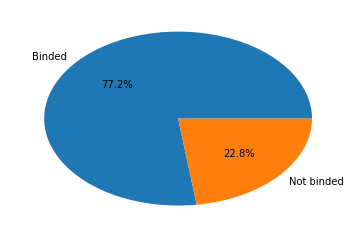

In [7]:
labels = ["Binded",'Not binded']
values=train_csv['pep_class'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels,  autopct='%1.1f%%')
plt.show()

So, the minimum outcome accuracy should be 77,3%.

Also, let's represent dependency of the 'meas' feature with the target class:

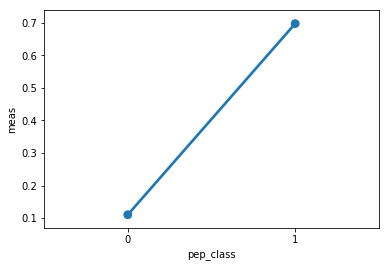

In [8]:
sns.pointplot(x="pep_class", y="meas", data=train_csv)

It is linear, so let's start with linear regression:

In [46]:
lr = LinearRegression()

lr.fit(X_train, y_train)

prediction_lr = lr.predict(X=X_train)

print("Test result: ", lr.score(X_test, y_test))

print("Train result: ", lr.score(X_train, y_train))

print("F-measure: ", f1_score(y_train, prediction_lr > 0.48))

Test result:  0.8073951208670277
Train result:  0.8050109080757373
F-measure:  0.9973040232268768


Continue with kNN:

In [66]:
list_of_predictions_knn = list()
list_of_test_results_knn = list()
list_of_train_results_knn = list()
list_of_f_knn = list()

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    list_of_predictions_knn.append(knn.predict(X_train))
    list_of_test_results_knn.append(knn.score(X_test, y_test))
    list_of_train_results_knn.append(knn.score(X_train, y_train))
    list_of_f_knn.append(f1_score(y_train, prediction_lr > 0.48))
    print("Predicted with ", i, " neighbours")

Predicted with  1  neighbours


Predicted with  2  neighbours


Predicted with  3  neighbours


Predicted with  4  neighbours


Predicted with  5  neighbours


Predicted with  6  neighbours


Predicted with  7  neighbours


Predicted with  8  neighbours


Predicted with  9  neighbours


Predicted with  10  neighbours


Predicted with  11  neighbours


Predicted with  12  neighbours


Predicted with  13  neighbours


Predicted with  14  neighbours


Predicted with  15  neighbours


Predicted with  16  neighbours


Predicted with  17  neighbours


Predicted with  18  neighbours


Predicted with  19  neighbours


Predicted with  20  neighbours


Predicted with  21  neighbours


Predicted with  22  neighbours


Predicted with  23  neighbours


Predicted with  24  neighbours


Predicted with  25  neighbours


Predicted with  26  neighbours


Predicted with  27  neighbours


Predicted with  28  neighbours


Predicted with  29  neighbours


Predicted with  30  neighbours


Predicted with  31  neighbours


Predicted with  32  neighbours


Predicted with  33  neighbours


Predicted with  34  neighbours


Predicted with  35  neighbours


Predicted with  36  neighbours


Predicted with  37  neighbours


Predicted with  38  neighbours


Predicted with  39  neighbours


Max test result:  0.998862594019446  takes  1  neighbors
Max test f-measure:  0.9973040232268768  takes  1  neighbors


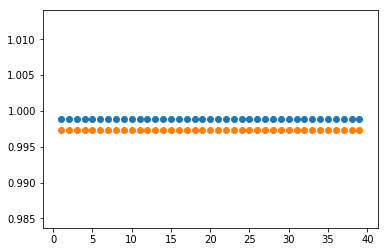

In [73]:
print("Max test result: ", max(list_of_test_results_knn), 
      " takes ", (list_of_test_results_knn.index(max(list_of_test_results_knn))+1), " neighbors")

plt.scatter(x=list((range(1, 40))), y=list_of_test_results_knn)

print("Max test f-measure: ", max(list_of_f_knn), 
      " takes ", (list_of_f_knn.index(max(list_of_f_knn))+1), " neighbors")

plt.scatter(x=list((range(1, 40))), y=list_of_f_knn)

Next classifier we'll try to use is Logistic Regression:

Train result: 0.9998113059202768
Accuracy: 0.9989359750504495
AUC-ROC: 0.9993114909781576
F-measure:  0.9973040232268768
######################################################


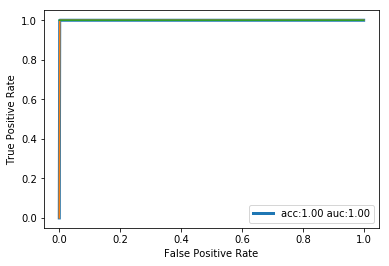

In [69]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

prediction = logistic_model.predict(X_test)

#print("Test result:", logistic_model.score(X_test, y_test))

print("Train result:", logistic_model.score(X_train, y_train))

print("Accuracy:", accuracy_score(y_test, prediction))

print("AUC-ROC:", roc_auc_score(y_test, prediction))

print("F-measure: ", f1_score(y_train, prediction_lr > 0.48))

print("######################################################")
logistic_model_proba = LogisticRegression()

logistic_model_proba.fit(X_train, y_train)

prediction_proba = logistic_model.predict_proba(X_test)


# Now let's create the ROC-curve and PR-curve to represent our model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
fpr, tpr, _ = roc_curve(y_test, prediction)
acc = logistic_model.score(X_test, y_test)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr, tpr, label="acc:%.2f auc:%.2f" % (acc, auc), linewidth=3)
plt.legend(loc="best")

precision, recall, thresholds = precision_recall_curve(y_test, prediction_proba[:, 1])

plt.plot(fpr, tpr)

plt.plot(recall, precision)

Next step we'll take is DecisionTree model:

In [70]:
decision_tree = DecisionTreeClassifier(random_state=divide_seed)

decision_tree.fit(X_train, y_train)

prediction_tree = decision_tree.predict(X_test)

print("Test result (accuracy):", decision_tree.score(X_test, y_test))

print("Accuracy:", accuracy_score(y_test, prediction_tree))

auc_roc_tree = roc_auc_score(y_test, prediction_tree)

print("AUC-ROC:", auc_roc_tree)

print("F-measure: ", f1_score(y_train, prediction_lr > 0.48))

print("######################################################")
decision_tree_proba = DecisionTreeClassifier(random_state=divide_seed)

decision_tree_proba.fit(X_train, y_train)

prediction_tree_proba = decision_tree_proba.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, prediction_tree_proba > 0.5))

auc_roc_tree = roc_auc_score(y_test, prediction_tree_proba)

print("AUC-ROC:", auc_roc_tree)

Test result (accuracy): 0.998862594019446
Accuracy: 0.998862594019446
AUC-ROC: 0.9992640075973409
F-measure:  0.9973040232268768
######################################################
Accuracy: 0.998862594019446
AUC-ROC: 0.9992640075973409


Let's try to use bagging in addition:

In [71]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=divide_seed), n_estimators=100)

bagging.fit(X_train, y_train)

prediction_bagging = bagging.predict(X_test)

auc_roc_tree = roc_auc_score(y_test, prediction_bagging)

print("######################################################")
bagging_proba = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=divide_seed), n_estimators=100)

bagging_proba.fit(X_train, y_train)

prediction_bagging_proba = bagging_proba.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, prediction_bagging_proba > 0.5))

auc_roc_tree = roc_auc_score(y_test, prediction_bagging_proba)

print("AUC-ROC:", auc_roc_tree)

print("F-measure: ", f1_score(y_train, prediction_lr > 0.48))

######################################################


Accuracy: 0.998862594019446
AUC-ROC: 0.9992640075973409
F-measure:  0.9973040232268768


Let's continue and bootstrap our sample:

In [72]:
new_predicted_tree = 0
new_predicted_tree_proba = np.zeros(X_test.shape[0])


for k in range(0, 100):
    i_new = np.random.randint(0, X_train.shape[0], int(2000*0.7))
    tree_class = DecisionTreeClassifier()
    
    tree_class.fit(X_train[i_new], array(y_train)[i_new])
    
    new_predicted_tree_proba += tree_class.predict_proba(X_test)[:, 1]
    
    new_predicted_tree += tree_class.predict(X_test)
    new_predicted_tree = np.divide(new_predicted_tree, 100).astype('int8')
    
new_predicted_tree_proba = new_predicted_tree_proba / 100
    

print("Accuracy:", accuracy_score(y_test, new_predicted_tree_proba > 0.5))
print("ROC-AUC:", roc_auc_score(y_test, new_predicted_tree_proba))
print("F-measure: ", f1_score(y_train, prediction_lr > 0.48))

Accuracy: 0.998862594019446
ROC-AUC: 0.9999050332383665
F-measure:  0.9973040232268768


And finally, let's use Random Forest classifier:

In [75]:
test_forest_results = list()
train_forest_results = list()
accuracy_forest_results = list()
auc_roc_forest_results = list()
forest_f_results = list()
time_list = list()

accuracy_forest_results_proba = list()
auc_roc_forest_results_proba = list()

start = time.time()
cur_time = start

for j in range(10, 1010, 10):
    
    decision_forest = RandomForestClassifier(random_state=divide_seed, n_estimators=j)
    decision_forest_proba = RandomForestClassifier(random_state=divide_seed, n_estimators=j)

    decision_forest.fit(X_train, y_train)
    
    decision_forest_proba.fit(X_train, y_train)

    prediction_forest = decision_forest.predict(X_test)
    
    prediction_forest_pr = decision_forest_proba.predict_proba(X_test)[:, 1]

    test_forest_results.append(decision_forest.score(X_test, y_test))

    train_forest_results.append(decision_forest.score(X_train, y_train))

    accuracy_forest_results.append(accuracy_score(y_test, prediction_forest))
    
    accuracy_forest_results_proba.append(accuracy_score(y_test, prediction_forest_pr > 0.5))

    auc_roc_forest = roc_auc_score(y_test, prediction_forest)
    
    forest_f_results.append(f1_score(y_train, prediction_lr > 0.48))

    auc_roc_forest_results.append(auc_roc_forest)
    auc_roc_forest_results_proba.append(roc_auc_score(y_test, prediction_forest_pr))
    if j % 50 == 0:
        cur_time = time.time() - cur_time
        if j % 100 != 0:
            time_list.append(cur_time)
            print('Number of trees:', j)
            print("Prediction completed by", j/10, "%")
            print("Took ", cur_time, " seconds")
            print("--------------------")
print("Prediction completed by 100%")
finish = time.time() - start

print("Prediction took ", finish, " seconds")

Number of trees: 50
Prediction completed by 5.0 %
Took  3.6665070056915283  seconds
--------------------


Number of trees: 150
Prediction completed by 15.0 %
Took  18.998415231704712  seconds
--------------------


Number of trees: 250
Prediction completed by 25.0 %
Took  45.70021629333496  seconds
--------------------


Number of trees: 350
Prediction completed by 35.0 %
Took  84.32013726234436  seconds
--------------------


Number of trees: 450
Prediction completed by 45.0 %
Took  134.5246832370758  seconds
--------------------


Number of trees: 550
Prediction completed by 55.0 %
Took  196.44591450691223  seconds
--------------------


Number of trees: 650
Prediction completed by 65.0 %
Took  269.55026865005493  seconds
--------------------


Number of trees: 750
Prediction completed by 75.0 %
Took  354.54129433631897  seconds
--------------------


Number of trees: 850
Prediction completed by 85.0 %
Took  451.43014430999756  seconds
--------------------


Number of trees: 950
Prediction completed by 95.0 %
Took  560.2303426265717  seconds
--------------------


Prediction completed by 100%
Prediction took  1178.9158082008362  seconds


Max test result:  0.998862594019446  takes  10  trees
Max accuracy result:  0.998862594019446  takes  10  trees
Max auc-roc result:  0.9992640075973409  takes  10  trees
Max accuracy result with proba:  0.998862594019446  takes  10  trees
Max auc-roc result with proba:  0.9992640075973409  takes  10  trees
Max F-measure:  0.9973040232268768  takes  10  trees


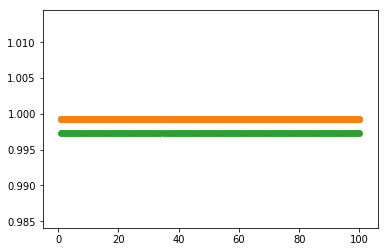

Time taken via number of trees:


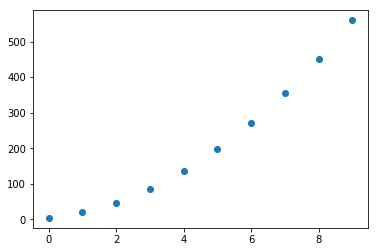

In [76]:
print("Max test result: ", max(test_forest_results), " takes ", (test_forest_results.index(max(test_forest_results))+1)*10, " trees")

print("Max accuracy result: ", max(accuracy_forest_results), " takes ", (accuracy_forest_results.index(max(accuracy_forest_results))+1)*10, " trees")

print("Max auc-roc result: ", max(auc_roc_forest_results), " takes ", (auc_roc_forest_results.index(max(auc_roc_forest_results))+1)*10, " trees")

print("Max accuracy result with proba: ", max(accuracy_forest_results_proba), " takes ", (accuracy_forest_results.index(max(accuracy_forest_results))+1)*10, " trees")

print("Max auc-roc result with proba: ", max(auc_roc_forest_results_proba), " takes ", (auc_roc_forest_results.index(max(auc_roc_forest_results))+1)*10, " trees")

print("Max F-measure: ", max(forest_f_results), " takes ", (forest_f_results.index(max(forest_f_results))+1)*10, " trees")


plt.scatter(x=list((range(1, 101))), y=auc_roc_forest_results)

plt.scatter(x=list((range(1, 101))), y=auc_roc_forest_results_proba)

plt.scatter(x=list((range(1, 101))), y=forest_f_results)
plt.show()

print("Time taken via number of trees:")
plt.scatter(x=list(range(0, 10)), y=time_list)
plt.show()